In [1]:
"""
3D forward modeling of total-field magnetic anomaly using prolate
ellipsoids (model with isotropic and anisotropic susceptibilities)
"""
# insert the figures in the notebook
%matplotlib inline

import numpy as np
from fatiando import utils, gridder
import prolate_ellipsoid
from mesher import ProlateEllipsoid
import plot_functions as pf
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

In [2]:
# The regional field
F, inc, dec = 23500., 30, -15

# Create a model formed by two ellipsoids
# The first ellipsoid does not have remanent magnetization and
# has an anisotropic susceptibility (different principal susceptibilities
# k1 = 0.3, k2 = 0.3, k3 = 0.1). 
# The second has a remanent magnetization of 2 A/m
# and an isotropic susceptibility of (all principal susceptibilities
# equal to 0.01)
model = [ProlateEllipsoid(0., -2000., 1000., 900., 600., -29., 0., 0.,
                          {'principal susceptibilities': [0.3, 0.2, 0.1],
                          'susceptibility angles': [-20., 20., 9.]}),
         ProlateEllipsoid(2500., 2500., 1000., 970., 500., 90., -32., 8.,
                          {'remanent magnetization': [2, 90, 0.],
                          'principal susceptibilities': [0.01, 0.01, 0.01],
                          'susceptibility angles': [13, 50, 7]})]

# Create a regular grid at 0m height
shape = (200, 200)
area = [-5000, 5000, -5000, 5000]
xp, yp, zp = gridder.regular(area, shape, z = 0)

# Calculate the total-field anomaly
tf = prolate_ellipsoid.tf(xp, yp, zp, model, F, inc, dec)

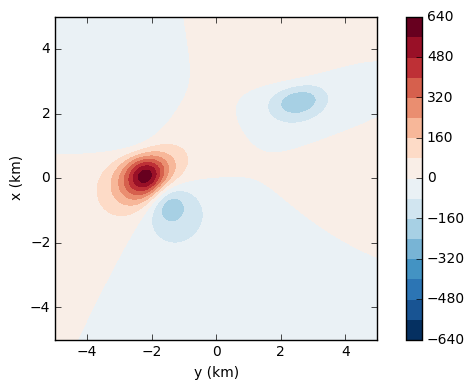

In [3]:
# Plot the results
plt.close('all')
plt.figure()
plt.axis('scaled')

ranges = np.max(np.abs([np.min(tf), np.max(tf)]))
levels = MaxNLocator(nbins=20).tick_values(-ranges, ranges)
cmap = plt.get_cmap('RdBu_r')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.contourf(0.001*yp.reshape(shape), 0.001*xp.reshape(shape),
             tf.reshape(shape), levels=levels,
             cmap = cmap, norm=norm)
plt.ylabel('x (km)')
plt.xlabel('y (km)')
plt.xlim(0.001*np.min(yp), 0.001*np.max(yp))
plt.ylim(0.001*np.min(xp), 0.001*np.max(xp))
cbar = plt.colorbar()

plt.tight_layout()

plt.show()

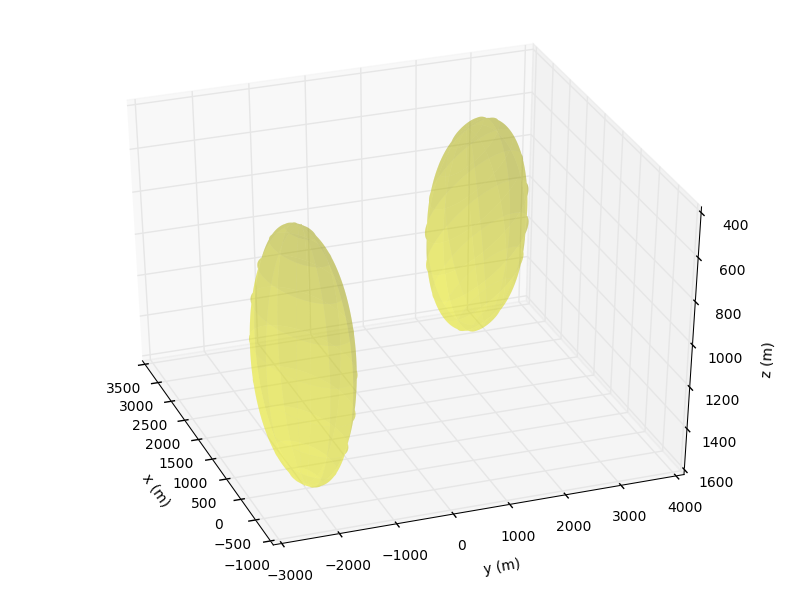

In [4]:
plt.close('all')
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')

for m in model:
    pf.draw_ellipsoid(ax, m, body_color=(1,1,0), body_alpha=0.3, plot_axes=False)

ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')

ax.view_init(215, 20)

plt.tight_layout(True)

plt.show()